In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Table of Contents:
* [Part 1.](#part1)  Gradient Descent
   
* [Part 2](#part2). Weighted Linear Regression

---
## Part 1. Gradient Descent  <a class="anchor" id="part1"></a>
---

In [2]:
def plot_function(f, x_min=-10, x_max=10):
    """
    Plot 2d function within specified range
    """
    x_grid = np.linspace(x_min, x_max,  500)
    plt.plot(x_grid, f(x_grid))
    plt.grid();

---

Consider a function $$f(x) = x^2 - 15\sin \left(\tfrac{\pi}{3}x\right).$$ 

Funtions `f(x)` and `grad_f(x)` evaluate function and its gradient in any given point `x`. 

In [3]:
def f(x):
    """
    Evaluates function `f(x) = x^2 - 15 \sin(x * pi/3)`
    
    Parameters
    ----------
    x : array_like
        Input(s) to the function
        
    Returns
    -------
    out : ndarray
        Function `f`, evaluated at point(s) x
    """
    
    return np.power(x, 2) - 15 * np.sin(np.pi / 3 * x)

    
def grad_f(x):
    """
    Evaluates gradient of a function `f(x) = x^2 - 15 \sin(x * \pi/3)`
    
    Parameters
    ----------
    x : array_like
        Point(s) at which gradient should be avalueated
        
    Returns
    -------
    out : ndarray
        Gradient of the function `f` evaluaed at point(s) x
    """
    
    return 2 * x - 5 * np.pi * np.cos(np.pi / 3 * x)

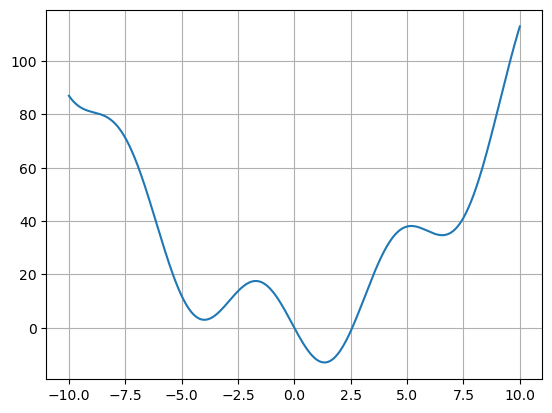

In [4]:
plot_function(f)

---

The gradient descent algorithm is the following:

* Choose initial point $x_0$
* Make steps in the direction of the anti-gradient
$$
x_{t+1} = x_t - \nu \nabla f(x_t), \\
$$
* Repeat until stopping criterion is satisfied. Possible stopping criterions are:
    - $\|x_{t+1} - x_t\| < \varepsilon$
    - $\|\nabla f(x_{t+1})\| < \varepsilon$

Here is a base class for the gradient descent algorithm with the following methods:
* `step`, which makes one step of the gradient descent algorithm 
* `stoppin_criterion`, we will use the first option, i.e. $\|x_{t+1} - x_t\| < \varepsilon$
* `find_min`, which finds local minimum of a functions

In [5]:
class BaseGD:
    """
    Gradient descent algorithm with constant learning rate.
    On each iteration algorithm makes a step in the direction of the anti-gradeint.
    If stopping criterion is statified


    Attributes
    ----------
    fn : callable
        Evaluates the target function
    grad_fn : callable
        Evaluates gradient of the target function
    lr: float
        Learning rate
    """
    
    def __init__(self, fn, grad_fn, lr=1e-2):
        self.fn = fn
        self.grad_fn = grad_fn
        self.lr = lr
        self.hist = []
        
    def get_lr(self):
        """
        Returns learning rate for a given iteration. In the base version the lr is constant
            
        Returns
        ----------
        out: float
            Learning rate for a current iteration
        """
        return self.lr
        
    def step(self, x):
        """
        Makes one step of the GD: evaluates gradient in the current point 
        and makes step in the opposite direction with learning rate defined in the method `get_lr`
        
        Parameters
        ----------
        x: array_like
            Current point
            
        Returns
        ----------
        out: ndarray
            Next point
        """

        return x - self.get_lr() * self.grad_fn(x)
        
    def stoppin_criterion(self, x_old, x_new, eps):
        """
        Test if the stopping criterion is statisfied 
        
        Parameters
        ----------
        x_old: array_like
            Current point
        x_new: array_like
            Next point
        eps: float
            Tolerance level
            
        Returns
        ----------
        out: bool
            If True, then no more steps should be done
        """
        
        return np.linalg.norm(x_new - x_old) < eps
        
    def find_min(self, x_0, max_iter=int(1e3), eps=1e-4):
        """
        Performs gradient descent starting from x_0. 
        On each iteration it 
         - makes step using `self.step`
         - saves new point to the history
         - check stopping criterion. If it is statisfied, stop and return last point from the history
        
        Return
        ----------
        out: tuple
            Local minimum found by GD and the value of target function
        """
        self.hist = [x_0]
        for _ in range(max_iter):
            
            x_old = self.hist[-1]
            x_new = self.step(x_old)
            self.hist.append(x_new)
            if self.stoppin_criterion(x_old, x_new, eps):
                break
        return self.hist[-1], self.fn(self.hist[-1])

In [6]:
def plot_history(fn, history):
    N_steps = len(history)
    assert N_steps > 1
    
    # plot all the points
    plt.scatter(history, fn(np.array(history)), 
                c='red', s=40, lw=0, alpha=0.5);

    # draw the arrows
    for j in range(1, N_steps):
        plt.annotate('', xy=[history[j], fn(history[j])],  xytext=[history[j-1], fn(history[j-1])], 
                     arrowprops={'arrowstyle': '-', 'color': 'r', 'lw': 1, 'alpha':0.8},
                     va='center', ha='center')


Now it is time to use the algorithm. Let's fix the starting point $x_0 = 9$. We can tune different hyperparameters of the method, so that it coverges to a **global** minimum (or to the point wich is close enough to the global minimum):
- learning rate (`lr`)
- maximal number of iterations (`max_iter`)
- tolerance of the stopping criterion (`eps`)

The function `find_global_opt` creates an instance of the BaseGD class, calls method `find_min` and returns instance of `BaseGD`.

In [7]:
x_0 = 9 # starting point

 
def find_global_opt():
    """
    Defines optimal hyperparameter for, runs gd and returns the instance of the correcponding class
    """
    
    lr = 0.1134
    max_iter = 15
    eps = 0.01
    
    gd = BaseGD(f, grad_f, lr)
    x_min, f_min = gd.find_min(x_0, max_iter, eps)
    return gd

Below we can visually test that the obtained solution is close to global minima.

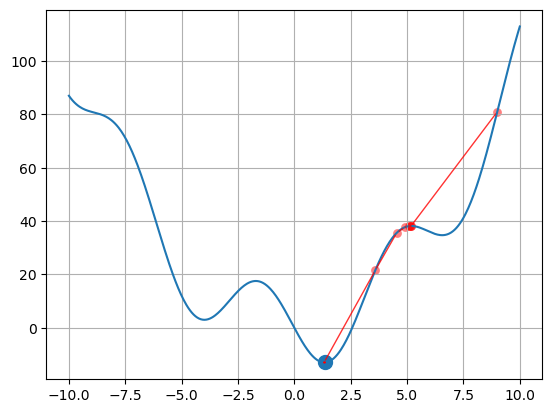

In [8]:
# plot the initial function
plot_function(f)

# get instance of the gd class an plot its history
gd = find_global_opt()
plot_history(f, gd.hist)

# extract last point from the history and plot
x_min = gd.hist[-1]
f_min = gd.fn(x_min)
plt.scatter(x_min, f_min, s=100);

In [9]:
# TEST find_global_opt
gd = find_global_opt()
print('x_min = {:.2f}'.format(gd.hist[-1]))
print('f(x_min) = {:.2f}'.format(gd.fn(gd.hist[-1])))


gd = find_global_opt()
x_min = gd.hist[-1]

x_min = 1.37
f(x_min) = -12.99


---
Since it is not easy to select proper learning rate for all the iterations. Let's now make the learning rate dependent on the step number.  

$$
x_{t+1} = x_t - \nu_t \nabla f(x_t), \\
\nu_t = \frac{\nu_0}{t}
$$

Where $\nu_0$ is the initial value and it is reduced with a constant speed. 

In [10]:
class LRStepGD(BaseGD):
    def __init__(self, fn, grad_fn, start_lr):
        super().__init__(fn, grad_fn, start_lr)
        
    def get_lr(self):
        """
        Returns learning rate for a given iteration using formula $\nu_t = \nu_0* 1/t
        Note that number of the current iteration can be extracted from the list with the history
            
        Returns
        ----------
        out: float
            Learning rate for a current iteration
        """
        
        return self.lr / (len(self.hist) + 1)

Now let's try different starting points and initial learing rate. It is easier to reach global optimum, because we can set large enough initial learing rate to jump over local minima.

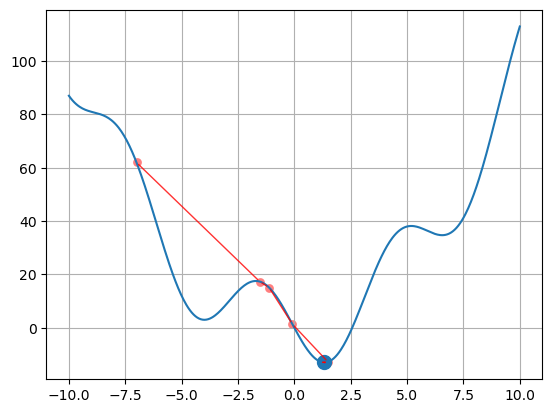

In [11]:
x_0 = -7 # inital point
start_lr = 0.5 # learning rate

gd = LRStepGD(f, grad_f, start_lr)
x_min, f_min = gd.find_min(x_0)

# draw plots
plot_function(f)
plot_history(f, gd.hist)
plt.scatter(x_min, f_min, s=100);

---
## Part 2. Weighted Linear Regression <a class="anchor" id="part2"></a>
---

### Linear Regression Recap

In simple linear regression we assume that all the observations are of the same 'importance' to the model. But in practice it is not always the case. Due to different reasons, it may happen that some observations are more valuable than others. Let's see, how we can take into account such infomation.

Simple linear regression.

* **Model** with k features:
$$
a(x) = w_0 + w_1x^1 + \dots w_kx^k = \langle w, x \rangle,\\
x = (1, x^1, \dots, x^k)
$$

* **Dataset:** 
$$\text{design matrix } X \in \mathbb{R}^{N \times k+1},\\
\text{target values }y \in \mathbb{R}^{N}$$

* **MSE Loss**:
$$
L = \tfrac{1}{N}\| y - Xw\|^2_2
$$

We obtained the matrix form of the MSE loss in the following manner:

$$
L(a, X) = \frac{1}{N}\sum_{i=1}^N (y_i -  a(x_i))^2 =  \frac{1}{N}\sum_{i=1}^N (y_i -  \langle w, x_i \rangle)^2 =  \frac{1}{N}(y - Xw)^T(y - Xw) =  \frac{1}{N} \| y - Xw\|^2_2
$$

In this case optimal parameters (that minimize the loss function) can be written in a closed-form:

$$
\hat{w} = \left(X^T X\right)^{-1}X^Ty
$$

### Weighted Linear Regression

Let's assume now, that some observations in our dataset are more "important" that others. E.g. we know that for some points the measurements are less accurate and want to reduce the weight of such observation. Another possible reason: we assume more recent observations to be more relevant and want to account for that in our loss function. 

* The **model**  (exactly the same):
$$
a(x) = w_0 + w_1x^1 + \dots w_kx^k
$$

* The **dataset**: 
$$\text{design matrix } X \in \mathbb{R}^{N \times k+1},\\
\text{target values }y \in \mathbb{R}^{N}$$

In addition, we have vector of weights, which reflects the importance of each observation:
$$v = (v_1, \dots, v_N)$$ 

* **MSE loss**:

We will change loss function, so that it includes the weights:
$$
L(a, X) = \frac{1}{N}\sum_{i=1}^N v_i(y_i -  a(x_i))^2
$$

In the matrix form, it will looks like this:
$$
L(a, X) =  \tfrac{1}{N}\| V^{1/2}(y - Xw)\|^2_2
$$

Where $V$ is matrix with weight $v$ on the diagonal and zeros elsewhere:

$$
V = \begin{pmatrix}
v_1 & 0 & \cdots & 0\\
0  & v_2 & \cdots & 0 \\
\vdots & \vdots & \ddots& \vdots \\
0 & 0 & \cdots & v_n
\end{pmatrix}
$$

I will train weighted linear regression using both closed form solution and gradient descent algorithm

---

Let's calculate gradient of the weighted MSE loss with respect to parameters for the model

$$
\nabla_w L =  \nabla_w \tfrac{1}{N}\| V^{1/2}(y - Xw)\|^2 = \tfrac{2}{N}(X^T V(Xw - y))
$$

Given vector $x \in \mathbb{R}^n$ and matrix $A \in \mathbb{R}^{k \times n}$
$$
\nabla_x \| x\|^2_2 = 2x
$$

$$
\nabla_x Ax = A^T
$$

The function `weighted_mse_grad` calculates gradient for any given vector $w$.  

In [12]:
def weighted_mse_grad(w, X, y, V):
    """
    Calculate gradient of the weight MSE loss in the given point w

    Parameters
    ----------
    w: array_like
        Current point, in which we want to evaluate gradient (vector with k+1 elements)
    X: array_like
        Design matrix with N rows and k+1 columns
    y: array_like
        Vector with N observations of the target variable
    V: array_like
        Diagonal matrix N x N, with the weights
    
    Returns
    ----------
    out: ndarray
        vector of gradient, k+1
    """
    
    N = X.shape[0]
    return 2 / N * np.dot((X.T @ V), (np.dot(X, w) - y))

To find analytical solution we need to solve
$$
\nabla_w L = 0
$$

---

Function `weighted_lr` calculates optimal parameters for the weighted linear regression

In [13]:
def weighted_lr(X, y, V):
    return np.dot(sp.linalg.inv(X.T @ V @ X) @ X.T @ V, y)

Now, let us test how the weigted linear regression work. Below we define true linear dependecy between $x$ and $y$. 

In [14]:
def true_func(x):
    return 1. + 2. * x 

def predict(X, w):
    return  X @ w

Let's consider now, that half of the points were measured with the error. E.g. due to the fact that we've used less accurate device to collect them. Below we artificially generate such dataset.

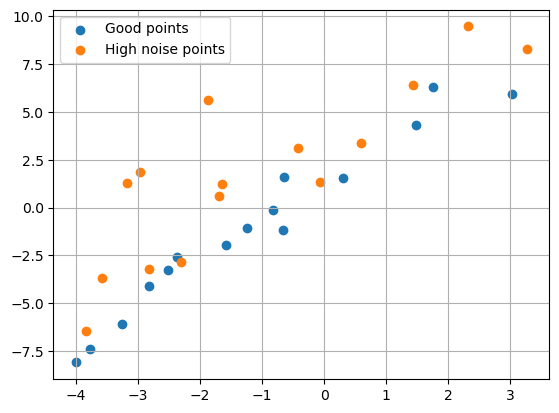

In [15]:
N = 15
np.random.seed(1)
x_good = np.random.uniform(-4, 4, N) 
y_good = true_func(x_good) + np.random.randn(N)

x_bad = np.random.uniform(-4, 4, N) 
y_bad = true_func(x_bad) + np.abs(np.random.randn(N)*4)

plt.scatter(x_good, y_good, label='Good points')
plt.scatter(x_bad, y_bad, label='High noise points')
plt.grid()
plt.legend()

x_full = np.concatenate([x_good, x_bad])
y_full = np.concatenate([y_good, y_bad])

Now, let's define two weight metrices. One in the assumption that all the points are equal. The latter will take into account the fact that second half of the objects in the dataset are more noisy.

In [16]:
X = np.stack([np.ones(2*N), x_full], 1)

v_none = np.diag(np.ones(2*N))
print(v_none[:3, :3])

v_smart = np.ones(2*N)
v_smart[:N] *= 4
v_smart = np.diag(v_smart)
print(v_smart[:3, :3])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]


---

Let's find optimal parameters of the weighted linear regression using weight matrices `v_none` and `v_smart` and call them `w_none` and `w_smart` correspondingly. 


In [17]:
w_none = weighted_lr(X, y_full, v_none)
w_smart = weighted_lr(X, y_full, v_smart)

print(w_none)
print(w_smart)

[2.48659221 1.90155953]
[1.76579771 2.00821624]


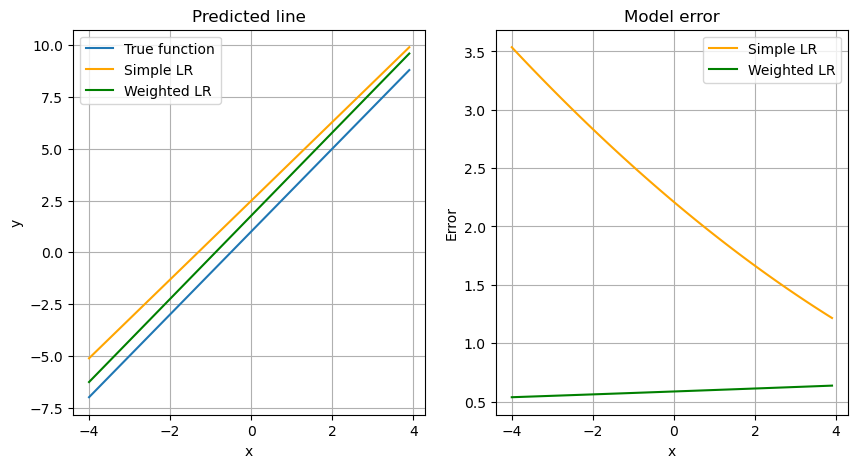

In [18]:
x_grid = np.arange(-4, 4, 0.1)
lr_predict = predict(np.stack([np.ones(x_grid.shape[0]), x_grid], 1), w_none)
wlr_predict = predict(np.stack([np.ones(x_grid.shape[0]), x_grid], 1), w_smart)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_grid, true_func(x_grid), label='True function')
ax[0].plot(x_grid, lr_predict, label='Simple LR', c='Orange')
ax[0].plot(x_grid, wlr_predict, label='Weighted LR', c='Green')
ax[0].set_title('Predicted line')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(x_grid, (true_func(x_grid) - lr_predict) ** 2, label='Simple LR', c='Orange')
ax[1].plot(x_grid, (true_func(x_grid) - wlr_predict) ** 2, label='Weighted LR', c='Green')
ax[1].set_title('Model error')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Error')

for i in ax:
    i.legend()
    i.grid()